<a href="https://colab.research.google.com/github/UdayKhunt/Machine-Learning-Projects/blob/main/Gold_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [2]:
gold_data = pd.read_csv('/content/gold_price_data.csv')

In [3]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,01/02/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,01/03/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,01/04/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,01/07/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,01/08/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
gold_data.isnull().sum()
gold_data = gold_data.drop(['Date'] ,axis = 1)

<Axes: >

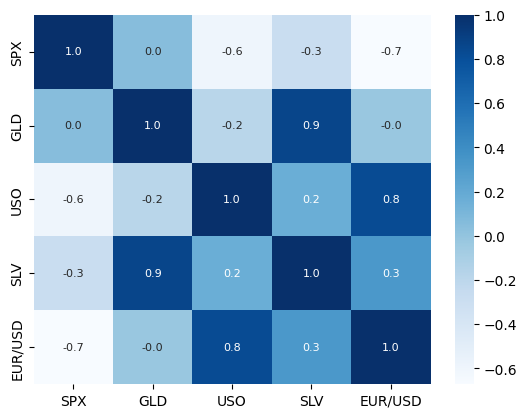

In [5]:
correlation = gold_data.corr()
sns.heatmap(correlation , cbar = True , cmap = 'Blues' , fmt = '.1f' , annot = True , annot_kws = {'size' : 8})

In [6]:
correlation['GLD']

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64

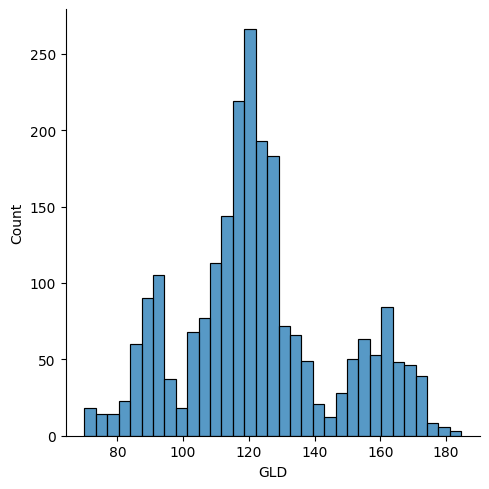

In [7]:
sns.displot(gold_data['GLD'])

In [8]:
X=gold_data.drop(['GLD'],axis=1)
Y=gold_data['GLD']

In [9]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=2,test_size=.2)

In [10]:
regressor = RandomForestRegressor(n_estimators = 100)

In [11]:
regressor.fit(X_train , Y_train)

RandomForestRegressor()

In [12]:
test_data_prediction = regressor.predict(X_test)

error_score = metrics.r2_score(test_data_prediction , Y_test)
print(error_score)

0.9890532748609232


In [13]:
Y_test = list(Y_test)

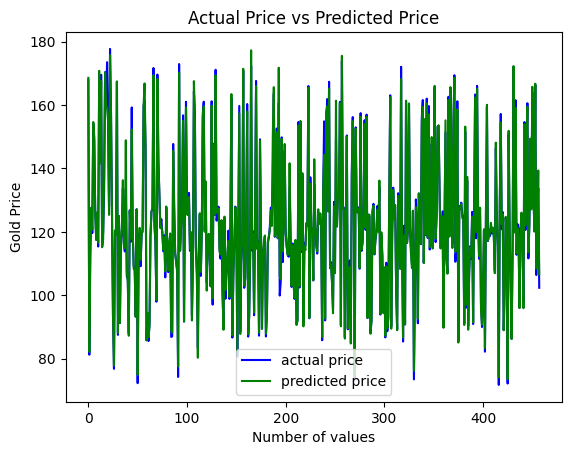

In [14]:
plt.plot(Y_test , color='blue',label='actual price')
plt.plot(test_data_prediction , color='green',label='predicted price')
plt.xlabel('Number of values')
plt.ylabel('Gold Price')
plt.title('Actual Price vs Predicted Price')
plt.legend()
plt.show()